In [1]:
%pylab inline
from scipy.io import loadmat
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, PredefinedSplit
import ipywidgets as widgets

Populating the interactive namespace from numpy and matplotlib


# SVM with Linear Kernel

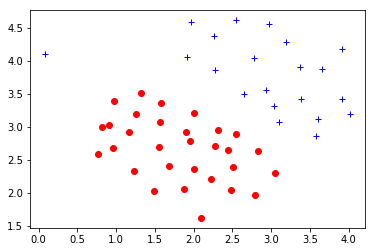

In [2]:
dataset_1 = loadmat('ex6data1.mat')
X1 = dataset_1['X']
y1 = dataset_1['y'][:,0]
X1_pos = X1[y1 == 1]
X1_neg = X1[y1 == 0]

plt.plot(X1_pos[:,0], X1_pos[:,1], '+b')
plt.plot(X1_neg[:,0], X1_neg[:,1], 'or');

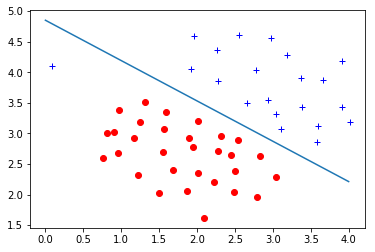

In [3]:
clf = SVC(kernel='linear')
clf.fit(X1,y1)

def boundary(clf, x):
    return -(clf.intercept_ + clf.coef_[0,0]*x) / clf.coef_[0,1]

plt.plot(X1_pos[:,0], X1_pos[:,1], '+b')
plt.plot(X1_neg[:,0], X1_neg[:,1], 'or');
plt.plot(np.linspace(0,4,100), boundary(clf, np.linspace(0,4,100)));

In [4]:
@widgets.interact(C=widgets.FloatLogSlider(value=100, min=-3, max=3))
def plot_svc1(C):
    clf = SVC(kernel='linear', C=C)
    clf.fit(X1,y1)

    def boundary(clf, x):
        return -(clf.intercept_ + clf.coef_[0,0]*x) / clf.coef_[0,1]

    plt.figure(figsize=(6,4))
    plt.plot(X1_pos[:,0], X1_pos[:,1], '+b')
    plt.plot(X1_neg[:,0], X1_neg[:,1], 'or');
    plt.plot(np.linspace(0,4,100), boundary(clf, np.linspace(0,4,100)));

interactive(children=(FloatLogSlider(value=100.0, description='C', max=3.0, min=-3.0), Output()), _dom_classes…

# SVM with Gaussian Kernel

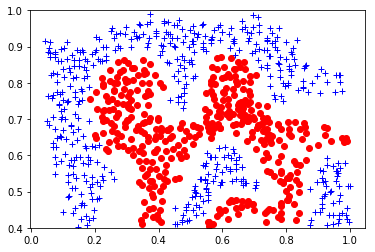

In [5]:
dataset_2 = loadmat('ex6data2.mat')
X2 = dataset_2['X']
y2 = dataset_2['y'][:,0]
X2_pos = X2[y2 == 1]
X2_neg = X2[y2 == 0]

plt.plot(X2_pos[:,0], X2_pos[:,1], '+b')
plt.plot(X2_neg[:,0], X2_neg[:,1], 'or');
plt.ylim([0.4,1]);

In [6]:
@widgets.interact(C=widgets.FloatLogSlider(value=1, min=-3, max=20),
                 gamma=widgets.FloatLogSlider(value=100, min=-1, max=4))
def plot_svc2(C, gamma):
    clf = SVC(kernel='rbf',C=C,gamma=gamma)
    clf.fit(X2,y2)

    XX2, YY2 = np.meshgrid(np.linspace(0,1,100), np.linspace(0,1,100))
    ZZ2 = clf.decision_function(np.vstack((XX2.flatten(),
                                          YY2.flatten())).T).reshape([100,100])
    ZZ2f = clf.predict(np.vstack((XX2.flatten(),
                                          YY2.flatten())).T).reshape([100,100])
    plt.plot(X2_pos[:,0], X2_pos[:,1], '+b')
    plt.plot(X2_neg[:,0], X2_neg[:,1], 'or');
    plt.contour(XX2,YY2,ZZ2,levels=[0]);
    plt.contourf(XX2,YY2,ZZ2f,cmap=plt.cm.Paired, alpha=0.2);
    plt.ylim([0.4,1]);

interactive(children=(FloatLogSlider(value=1.0, description='C', max=20.0, min=-3.0), FloatLogSlider(value=100…

# SVM with Cross Validation

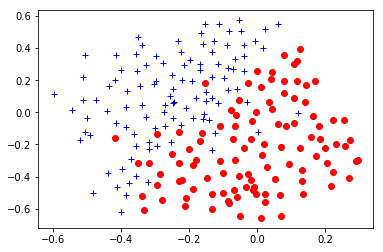

In [7]:
dataset_3 = loadmat('ex6data3.mat')
X3 = dataset_3['X']
y3 = dataset_3['y'][:,0]
X3_val = dataset_3['Xval']
y3_val = dataset_3['yval'][:,0]
X3_pos = X3[y3 == 1]
X3_neg = X3[y3 == 0]

plt.plot(X3_pos[:,0], X3_pos[:,1], '+b')
plt.plot(X3_neg[:,0], X3_neg[:,1], 'or');

SVC(C=3.1622776601683795, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=3.1622776601683795,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False) 0.948905109489051


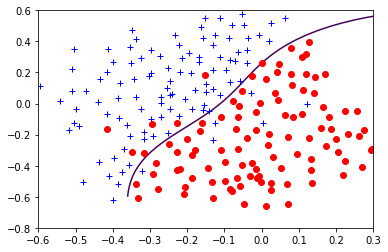

In [8]:
split = PredefinedSplit(np.concatenate((np.full(y3.size,0),
                                        np.full(y3_val.size,1))))
clf = GridSearchCV(SVC(kernel='rbf'),
                   {
                       'C': np.logspace(0,10,11,base=np.sqrt(10)),
                       'gamma': np.logspace(0,10,11,base=np.sqrt(10))
                   },
                  cv=split)
clf.fit(np.concatenate((X3,X3_val)),
        np.concatenate((y3,y3_val)))
print(clf.best_estimator_, clf.best_score_)

XX3, YY3 = np.meshgrid(np.linspace(-0.6,1,50), np.linspace(-0.6,1,50))
ZZ3 = clf.decision_function(np.vstack((XX3.flatten(),
                                      YY3.flatten())).T).reshape([50,50])

plt.plot(X3_pos[:,0], X3_pos[:,1], '+b')
plt.plot(X3_neg[:,0], X3_neg[:,1], 'or');
plt.contour(XX3,YY3,ZZ3,levels=[0]);
plt.xlim([-0.6,0.3])
plt.ylim([-0.8,0.6]);